#

# **Import Library**

In [3]:
# import after file upload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **Load dataset**

In [ ]:

# Load the uploaded dataset
file_path = "/content/malicious_phish.csv" # Corrected file path
df = pd.read_csv(file_path)

In [4]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


# **Preprocessing and Feature Engineering**

In [5]:

# Basic preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['url'] = df['url'].str.lower()

# Feature engineering
df['url_length'] = df['url'].apply(len)
df['has_https'] = df['url'].apply(lambda x: 'https' in x).astype(int)
df['num_dots'] = df['url'].apply(lambda x: x.count('.'))
df['has_ip'] = df['url'].str.contains(r'\d+\.\d+\.\d+\.\d+').astype(int)


In [6]:
df

,url,type,url_length,has_https,num_dots,has_ip
0,br-icloud.com.br,phishing,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,3,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,2,0
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,39,0,3,0
651187,games.teamxbox.com/xbox-360/1860/dead-space/,phishing,44,0,2,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,42,0,2,0
651189,en.wikipedia.org/wiki/dead_space_(video_game),phishing,45,0,2,0


In [7]:
df.head(10)

,url,type,url_length,has_https,num_dots,has_ip
0,br-icloud.com.br,phishing,16,0,2,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,2,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,0,3,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,2,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,118,0,2,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,45,0,2,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,46,0,1,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,44,0,2,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,45,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641125 entries, 0 to 651190
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   url         641125 non-null  object
 1   type        641125 non-null  object
 2   url_length  641125 non-null  int64 
 3   has_https   641125 non-null  int64 
 4   num_dots    641125 non-null  int64 
 5   has_ip      641125 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 34.2+ MB


# **EDA**

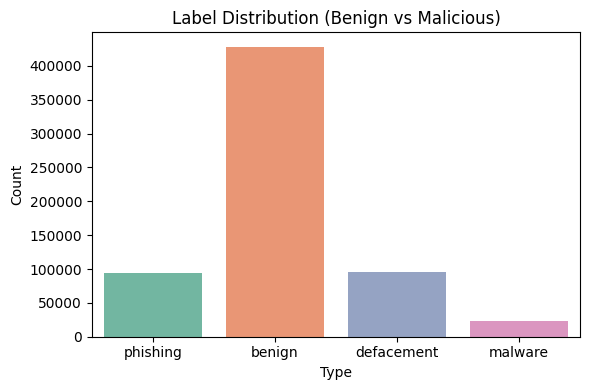

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Label Distribution (Benign vs Malicious)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

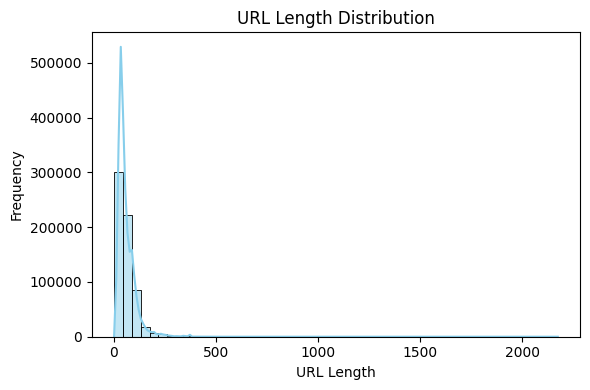

In [10]:

#  URL Length Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['url_length'], bins=50, kde=True, color='skyblue')
plt.title('URL Length Distribution')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


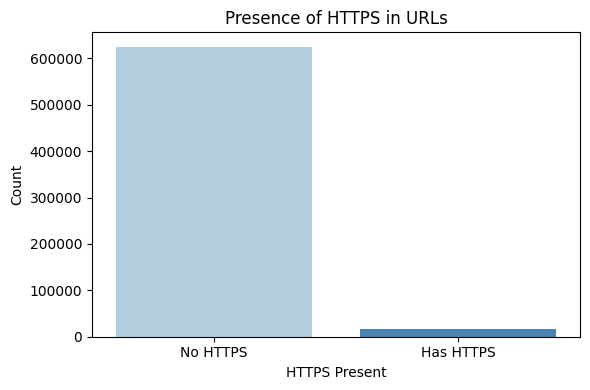

In [11]:
# Presence of HTTPS
plt.figure(figsize=(6, 4))
sns.countplot(x='has_https', data=df, palette='Blues')
plt.title('Presence of HTTPS in URLs')
plt.xlabel('HTTPS Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No HTTPS', 'Has HTTPS'])
plt.tight_layout()
plt.show()

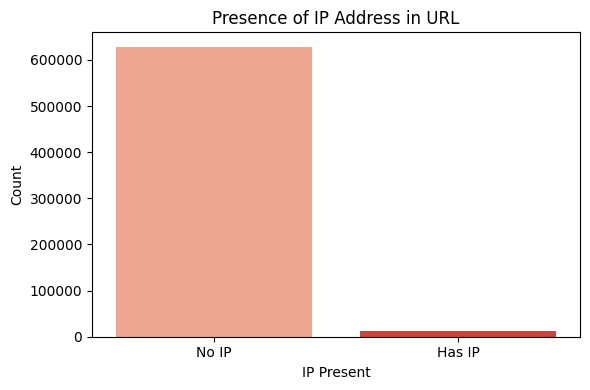

In [12]:

#  Presence of IP in URL
plt.figure(figsize=(6, 4))
sns.countplot(x='has_ip', data=df, palette='Reds')
plt.title('Presence of IP Address in URL')
plt.xlabel('IP Present')
plt.ylabel('Count')
plt.xticks([0, 1], ['No IP', 'Has IP'])
plt.tight_layout()
plt.show()



